<a href="https://colab.research.google.com/github/airplanemodelcrz/UpLevel-pythontrading/blob/main/maverick_ver_googl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Installing necessary packages
!pip install requests
!pip install alpha_vantage
!pip install mpl_finance

     |████████████████████████████████| 1.3MB 6.8MB/s 
     |████████████████████████████████| 296kB 39.6MB/s 
     |████████████████████████████████| 143kB 39.0MB/s 
  Created wheel for idna-ssl: filename=idna_ssl-1.1.0-cp36-none-any.whl size=3163 sha256=c7631b69606dfea3d40a74e7764394ad98468a4f565dba65450538a3b8276ccd
  Stored in directory: /root/.cache/pip/wheels/d3/00/b3/32d613e19e08a739751dd6bf998cfed277728f8b2127ad4eb7
Successfully built idna-ssl


In [ ]:
# importing 
import requests
import pandas as pd

key = 'FZ4A1OV89CLJOU4L'
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&outputsize=full&symbol=GOOGL&interval=5min&apikey={}'.format(key)
data = requests.get(url)
status_code = data.status_code
print(status_code)

200


In [ ]:
googl_data = data.json()
print(googl_data)


{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes', '2. Symbol': 'GOOGL', '3. Last Refreshed': '2021-02-19', '4. Output Size': 'Full size', '5. Time Zone': 'US/Eastern'}, 'Time Series (Daily)': {'2021-02-19': {'1. open': '2107.7900', '2. high': '2118.5800', '3. low': '2083.4300', '4. close': '2088.8100', '5. volume': '1896939'}, '2021-02-18': {'1. open': '2105.0000', '2. high': '2121.9900', '3. low': '2093.3300', '4. close': '2105.8100', '5. volume': '1128549'}, '2021-02-17': {'1. open': '2093.9800', '2. high': '2122.4434', '3. low': '2088.3500', '4. close': '2118.6200', '5. volume': '986524'}, '2021-02-16': {'1. open': '2091.7500', '2. high': '2145.1400', '3. low': '2091.7500', '4. close': '2110.7000', '5. volume': '1550195'}, '2021-02-12': {'1. open': '2079.7700', '2. high': '2099.5000', '3. low': '2073.5700', '4. close': '2095.0300', '5. volume': '949525'}, '2021-02-11': {'1. open': '2091.0000', '2. high': '2094.0000', '3. low': '2068.8600', '4. clo

In [ ]:
df = pd.DataFrame.from_dict(googl_data['Time Series (Daily)'], orient='index')

df.drop('5. volume', axis=1, inplace=True)

# Inversing the rows in df

df.iloc[::-1]


,1. open,2. high,3. low,4. close
2004-08-19,100.0100,104.0600,95.9600,100.3350
2004-08-20,101.0100,109.0800,100.5000,108.3100
2004-08-23,110.7600,113.4800,109.0500,109.4000
2004-08-24,111.2400,111.6000,103.5700,104.8700
2004-08-25,104.7600,108.0000,103.8800,106.0000
...,...,...,...,...
2021-02-12,2079.7700,2099.5000,2073.5700,2095.0300
2021-02-16,2091.7500,2145.1400,2091.7500,2110.7000
2021-02-17,2093.9800,2122.4434,2088.3500,2118.6200
2021-02-18,2105.0000,2121.9900,2093.3300,2105.8100


In [ ]:
# daily percentage change visualize daily data 

import matplotlib.pyplot as plt
import mpl_finance
from mpl_finance import candlestick_ohlc
from matplotlib import dates as mdates


df.columns = ['open', 'high', 'low', 'close']
df = df.rename_axis('date').reset_index()
print (df.dtypes)
df['open'] = pd.to_numeric(df['open'])
df['high'] = pd.to_numeric(df['high'])
df['low'] = pd.to_numeric(df['low'])
df['close'] = pd.to_numeric(df['close'])
df.date = pd.to_datetime(df.date)
df["date"] = df["date"].apply(mdates.date2num)
print(df.dtypes)

date     object
open     object
high     object
low      object
close    object
dtype: object
date     float64
open     float64
high     float64
low      float64
close    float64
dtype: object


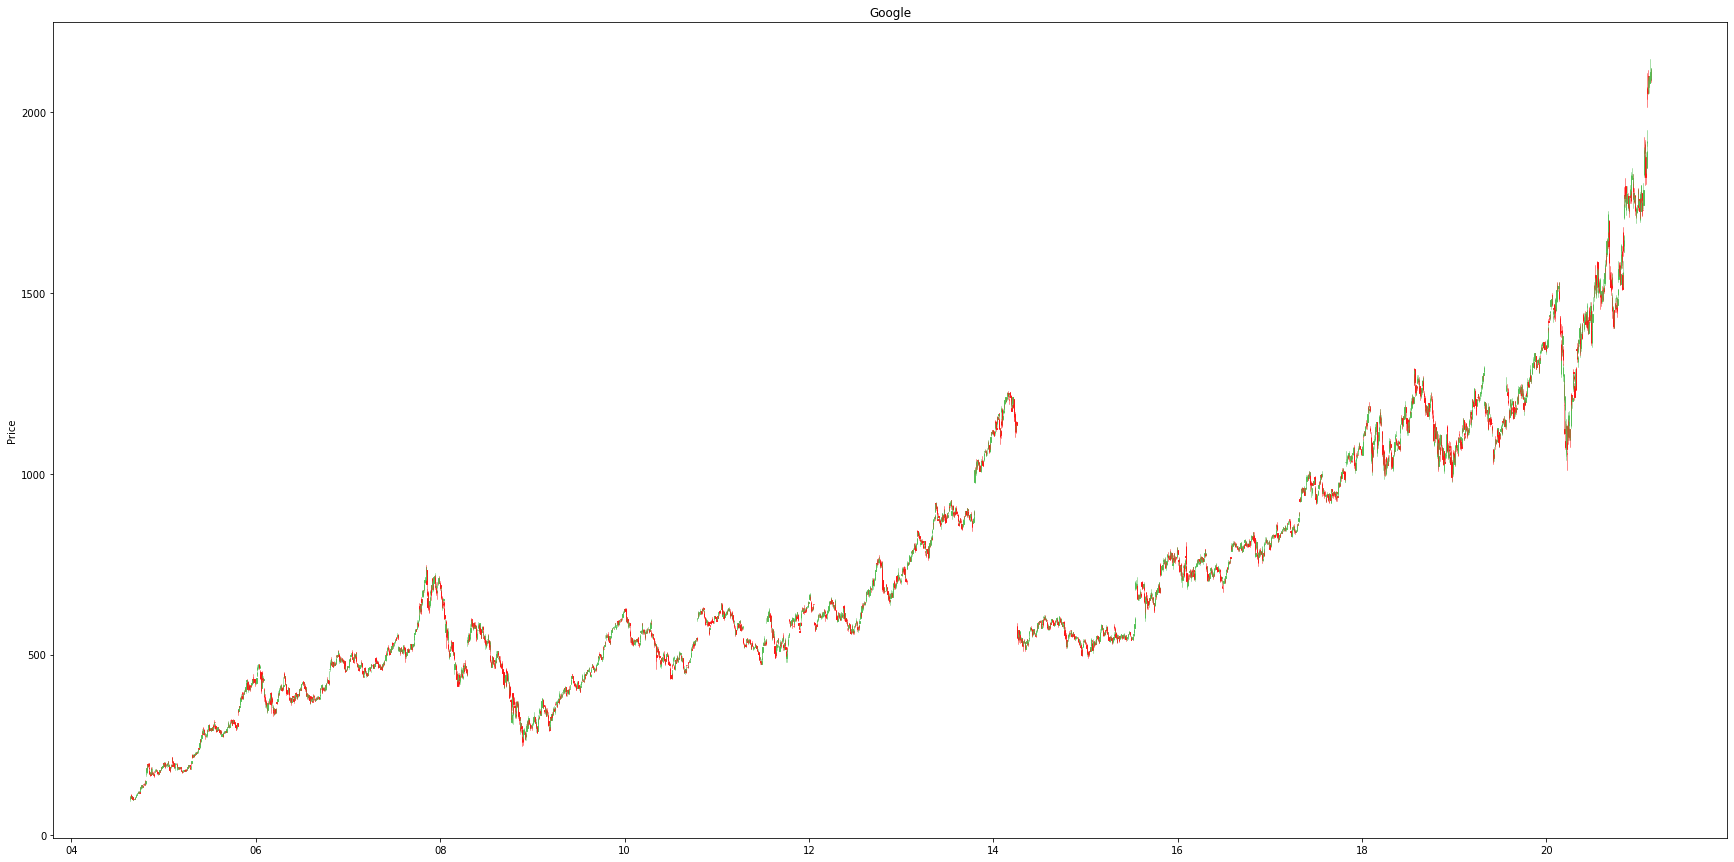

In [ ]:
fig, ax = plt.subplots(figsize=(30,15))
plt.ylabel('Price')
plt.title('Google')

candlestick_ohlc(ax, df.values, width=1, colorup='#53c156', colordown='#ff1717',)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%y'))

<Figure size 432x288 with 0 Axes>

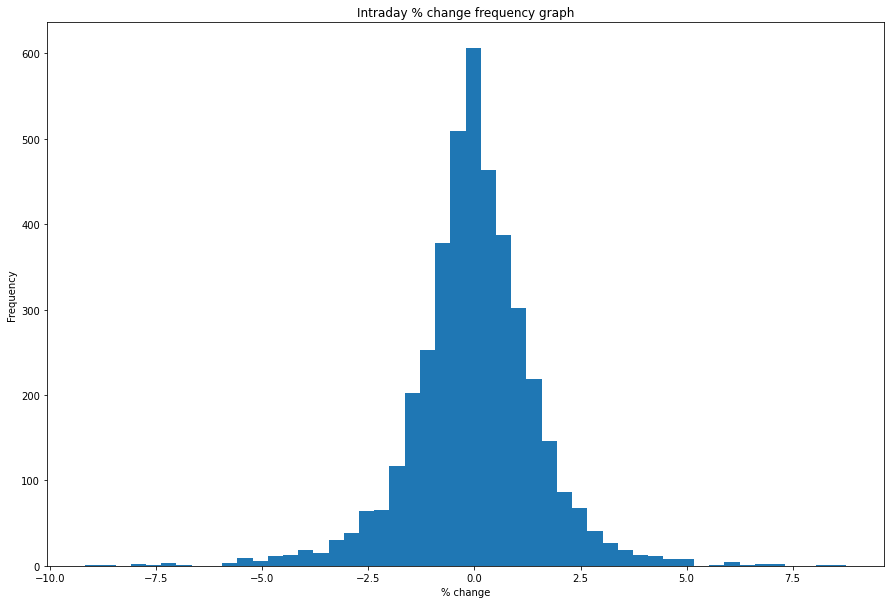

In [ ]:
df = pd.DataFrame.from_dict(googl_data['Time Series (Daily)'], orient='index')

df.columns = ['open', 'high', 'low', 'close', 'volume']
df = df.rename_axis('date').reset_index()
df['open'] = pd.to_numeric(df['open'])
df['high'] = pd.to_numeric(df['high'])
df['low'] = pd.to_numeric(df['low'])
df['close'] = pd.to_numeric(df['close'])
df['volume'] = pd.to_numeric(df['volume'])

# Inversing the rows in df
df.iloc[::-1]

df['intra_change'] = ((df['close']-df['open'])/df['open'])*100

# Intraday % change

fig = plt.figure()
fig, ax1 = plt.subplots(figsize = (15,10))
ax1.hist(df['intra_change'], bins=50)
ax1.set_xlabel('% change')
ax1.set_ylabel('Frequency')
ax1.set_title('Intraday % change frequency graph')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


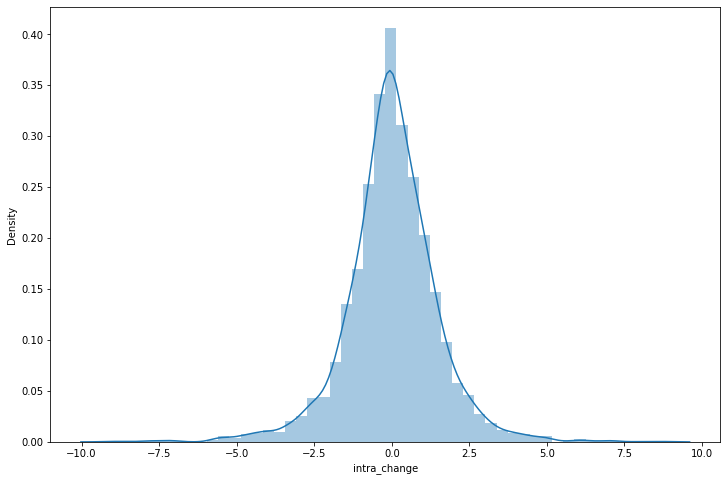

In [ ]:
# Intraday % change sns graph
import seaborn as sns
fig = plt.figure(figsize=(12,8))
sns.distplot(df["intra_change"])
plt.show()

In [ ]:
# Inversing the rows in df
df = df.iloc[::-1]
df

,date,open,high,low,close,volume,intra_change
4154,2004-08-19,100.01,104.0600,95.96,100.335,44659000,0.324968
4153,2004-08-20,101.01,109.0800,100.50,108.310,22834300,7.227007
4152,2004-08-23,110.76,113.4800,109.05,109.400,18256100,-1.227880
4151,2004-08-24,111.24,111.6000,103.57,104.870,15247300,-5.726357
4150,2004-08-25,104.76,108.0000,103.88,106.000,9188600,1.183658
...,...,...,...,...,...,...,...
4,2021-02-12,2079.77,2099.5000,2073.57,2095.030,949525,0.733735
3,2021-02-16,2091.75,2145.1400,2091.75,2110.700,1550195,0.905940
2,2021-02-17,2093.98,2122.4434,2088.35,2118.620,986524,1.176707
1,2021-02-18,2105.00,2121.9900,2093.33,2105.810,1128549,0.038480


In [ ]:
# Daily % change
df['daily_change'] = df['close'].pct_change(1) * 100
df

,date,open,high,low,close,volume,intra_change,daily_change
4154,2004-08-19,100.01,104.0600,95.96,100.335,44659000,0.324968,NaN
4153,2004-08-20,101.01,109.0800,100.50,108.310,22834300,7.227007,7.948373
4152,2004-08-23,110.76,113.4800,109.05,109.400,18256100,-1.227880,1.006371
4151,2004-08-24,111.24,111.6000,103.57,104.870,15247300,-5.726357,-4.140768
4150,2004-08-25,104.76,108.0000,103.88,106.000,9188600,1.183658,1.077525
...,...,...,...,...,...,...,...,...
4,2021-02-12,2079.77,2099.5000,2073.57,2095.030,949525,0.733735,0.300658
3,2021-02-16,2091.75,2145.1400,2091.75,2110.700,1550195,0.905940,0.747961
2,2021-02-17,2093.98,2122.4434,2088.35,2118.620,986524,1.176707,0.375231
1,2021-02-18,2105.00,2121.9900,2093.33,2105.810,1128549,0.038480,-0.604639


<Figure size 432x288 with 0 Axes>

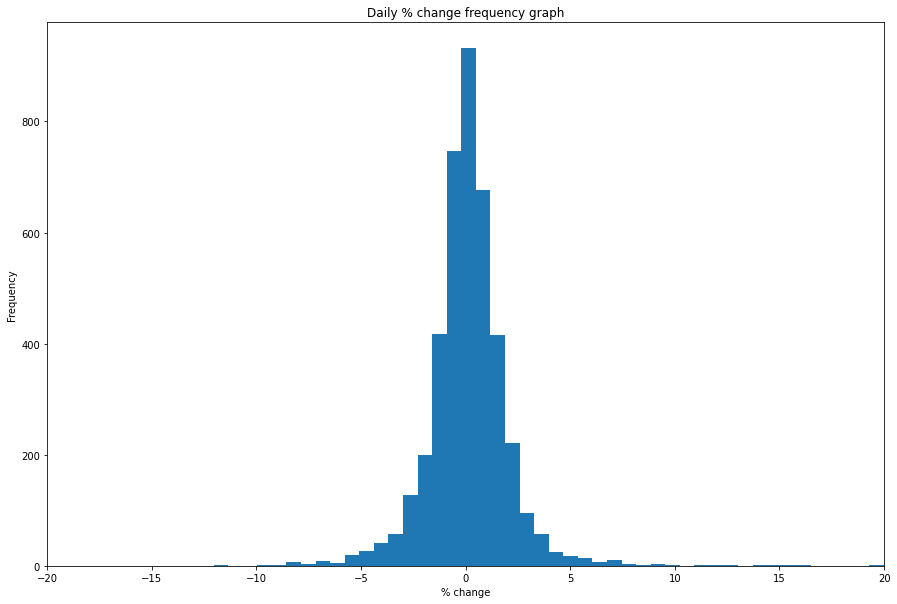

In [ ]:
fig = plt.figure()
fig, ax2 = plt.subplots(figsize = (15,10))
ax2.hist(df['daily_change'], bins=100)
ax2.set_xlabel('% change')
ax2.set_ylabel('Frequency')
ax2.set_title('Daily % change frequency graph')
ax2.set_xlim(-20,20)
plt.show()


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


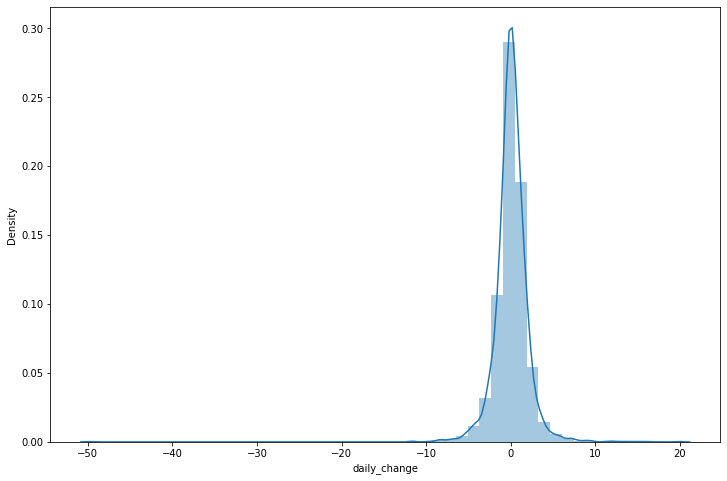

In [ ]:
# Daily % change sns graph
fig = plt.figure(figsize=(12,8))
sns.distplot(df["daily_change"][1:])
plt.xlabel("daily_change")
plt.show()

In [ ]:
# Checking the df

df


,date,open,high,low,close,volume,intra_change,daily_change
4154,2004-08-19,100.01,104.0600,95.96,100.335,44659000,0.324968,NaN
4153,2004-08-20,101.01,109.0800,100.50,108.310,22834300,7.227007,7.948373
4152,2004-08-23,110.76,113.4800,109.05,109.400,18256100,-1.227880,1.006371
4151,2004-08-24,111.24,111.6000,103.57,104.870,15247300,-5.726357,-4.140768
4150,2004-08-25,104.76,108.0000,103.88,106.000,9188600,1.183658,1.077525
...,...,...,...,...,...,...,...,...
4,2021-02-12,2079.77,2099.5000,2073.57,2095.030,949525,0.733735,0.300658
3,2021-02-16,2091.75,2145.1400,2091.75,2110.700,1550195,0.905940,0.747961
2,2021-02-17,2093.98,2122.4434,2088.35,2118.620,986524,1.176707,0.375231
1,2021-02-18,2105.00,2121.9900,2093.33,2105.810,1128549,0.038480,-0.604639


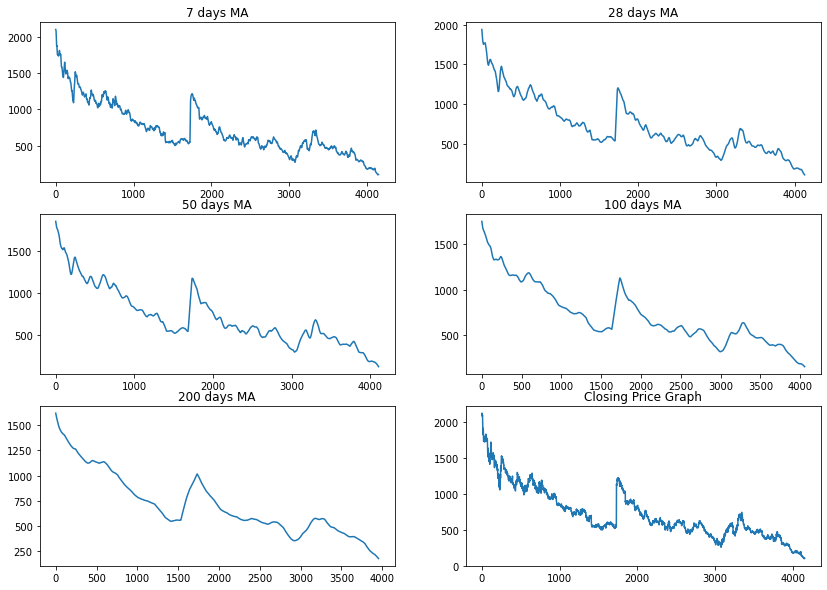

In [ ]:
# Moving Averages Graphs

fig = plt.figure(figsize=(14,10))

ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)

ax1.plot(df['close'].rolling(window=7).mean())
ax1.set_title('7 days MA')
ax2.plot(df['close'].rolling(window=28).mean())
ax2.set_title('28 days MA')
ax3.plot(df['close'].rolling(window=50).mean())
ax3.set_title('50 days MA')
ax4.plot(df['close'].rolling(window=100).mean())
ax4.set_title('100 days MA')
ax5.plot(df['close'].rolling(window=200).mean())
ax5.set_title('200 days MA')
ax6.plot(df['close'])
ax6.set_title('Closing Price Graph')

plt.show()

In [ ]:
# Inversing the rows in df

df.iloc[::-1]

# Appending 50 and 100 days MA into df

df['50_days MA'] = df['close'].rolling(window=50).mean()
df['100_days MA'] = df['close'].rolling(window=100).mean()
df['200_days MA'] = df['close'].rolling(window=200).mean()

df


,date,open,high,low,close,volume,intra_change,daily_change,50_days MA,100_days MA,200_days MA
4154,2004-08-19,100.01,104.0600,95.96,100.335,44659000,0.324968,NaN,NaN,NaN,NaN
4153,2004-08-20,101.01,109.0800,100.50,108.310,22834300,7.227007,7.948373,NaN,NaN,NaN
4152,2004-08-23,110.76,113.4800,109.05,109.400,18256100,-1.227880,1.006371,NaN,NaN,NaN
4151,2004-08-24,111.24,111.6000,103.57,104.870,15247300,-5.726357,-4.140768,NaN,NaN,NaN
4150,2004-08-25,104.76,108.0000,103.88,106.000,9188600,1.183658,1.077525,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4,2021-02-12,2079.77,2099.5000,2073.57,2095.030,949525,0.733735,0.300658,1834.8340,1724.4853,1601.60160
3,2021-02-16,2091.75,2145.1400,2091.75,2110.700,1550195,0.905940,0.747961,1840.5486,1730.9941,1605.42160
2,2021-02-17,2093.98,2122.4434,2088.35,2118.620,986524,1.176707,0.375231,1846.4842,1738.0864,1609.42810
1,2021-02-18,2105.00,2121.9900,2093.33,2105.810,1128549,0.038480,-0.604639,1852.1252,1744.9159,1613.34265


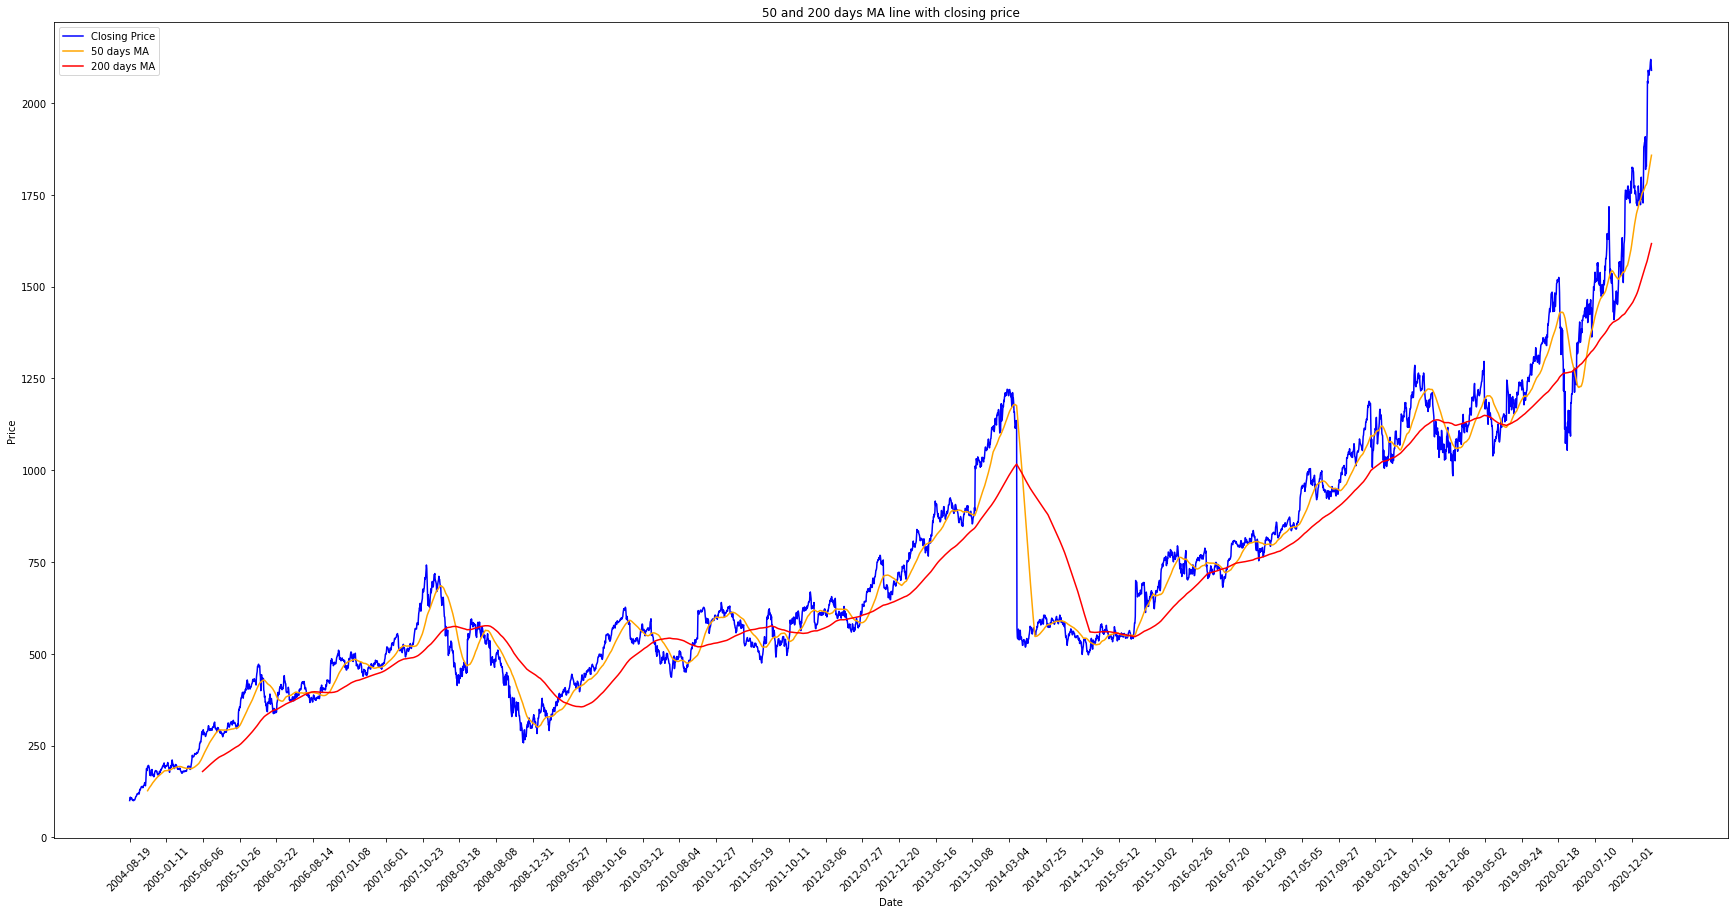

In [ ]:
# Importing datetime function

import matplotlib.dates as mdates

# 50 and 200 days MA line with closing price line

fig, ax = plt.subplots(figsize=(30,15))

plt.plot(df['date'], df['close'], c='blue', label='Closing Price')
plt.plot(df['date'], df['50_days MA'], c='orange', label='50 days MA')
plt.plot(df['date'], df['200_days MA'], c='red', label = '200 days MA')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('50 and 200 days MA line with closing price')
plt.legend(loc='best')
plt.xticks(rotation=45)

# code below reverses the date axis
# plt.xlim(plt.xlim()[::-1])

ax.set_xticks(ax.get_xticks()[::100])

plt.show()

In [ ]:
# Initializing Signal

df['Signal'] = 0

# Resetting the index so 0 appears at the top while the last row has the latest index.

df = df.reset_index(drop = True) 

# Interation...

for i in df.index: 
  if df['50_days MA'][i] > df['200_days MA'][i]:
    df['Signal'][i] = 1
df['Signal'] = df['Signal'].diff()

df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,date,open,high,low,close,volume,intra_change,daily_change,50_days MA,100_days MA,200_days MA,Signal
0,2004-08-19,100.01,104.0600,95.96,100.335,44659000,0.324968,NaN,NaN,NaN,NaN,NaN
1,2004-08-20,101.01,109.0800,100.50,108.310,22834300,7.227007,7.948373,NaN,NaN,NaN,0.0
2,2004-08-23,110.76,113.4800,109.05,109.400,18256100,-1.227880,1.006371,NaN,NaN,NaN,0.0
3,2004-08-24,111.24,111.6000,103.57,104.870,15247300,-5.726357,-4.140768,NaN,NaN,NaN,0.0
4,2004-08-25,104.76,108.0000,103.88,106.000,9188600,1.183658,1.077525,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4150,2021-02-12,2079.77,2099.5000,2073.57,2095.030,949525,0.733735,0.300658,1834.8340,1724.4853,1601.60160,0.0
4151,2021-02-16,2091.75,2145.1400,2091.75,2110.700,1550195,0.905940,0.747961,1840.5486,1730.9941,1605.42160,0.0
4152,2021-02-17,2093.98,2122.4434,2088.35,2118.620,986524,1.176707,0.375231,1846.4842,1738.0864,1609.42810,0.0
4153,2021-02-18,2105.00,2121.9900,2093.33,2105.810,1128549,0.038480,-0.604639,1852.1252,1744.9159,1613.34265,0.0


In [ ]:
# Brought shares with full sum of money ($10000)
# Assuming we start investing after IPO 

profit = (10000 * df['close'].iloc[-1] / df['close'].iloc[0]) - 10000
print(profit)

198183.58499028257


In [ ]:
# Brought shares with full sum of money following trading signals

def investment_value(df):
  dollar_amount = 10000
  for i,row in df.iterrows():
    if i == 0:
        continue
    if row['Signal'] == 1:
        ratio = dollar_amount / df['close'].iloc[i] 
    if row['Signal'] == -1:
        dollar_amount = ratio * df['close'].iloc[i]
  return dollar_amount 

trading_profit = investment_value(df) - 10000
print(trading_profit)

7324.960855144891


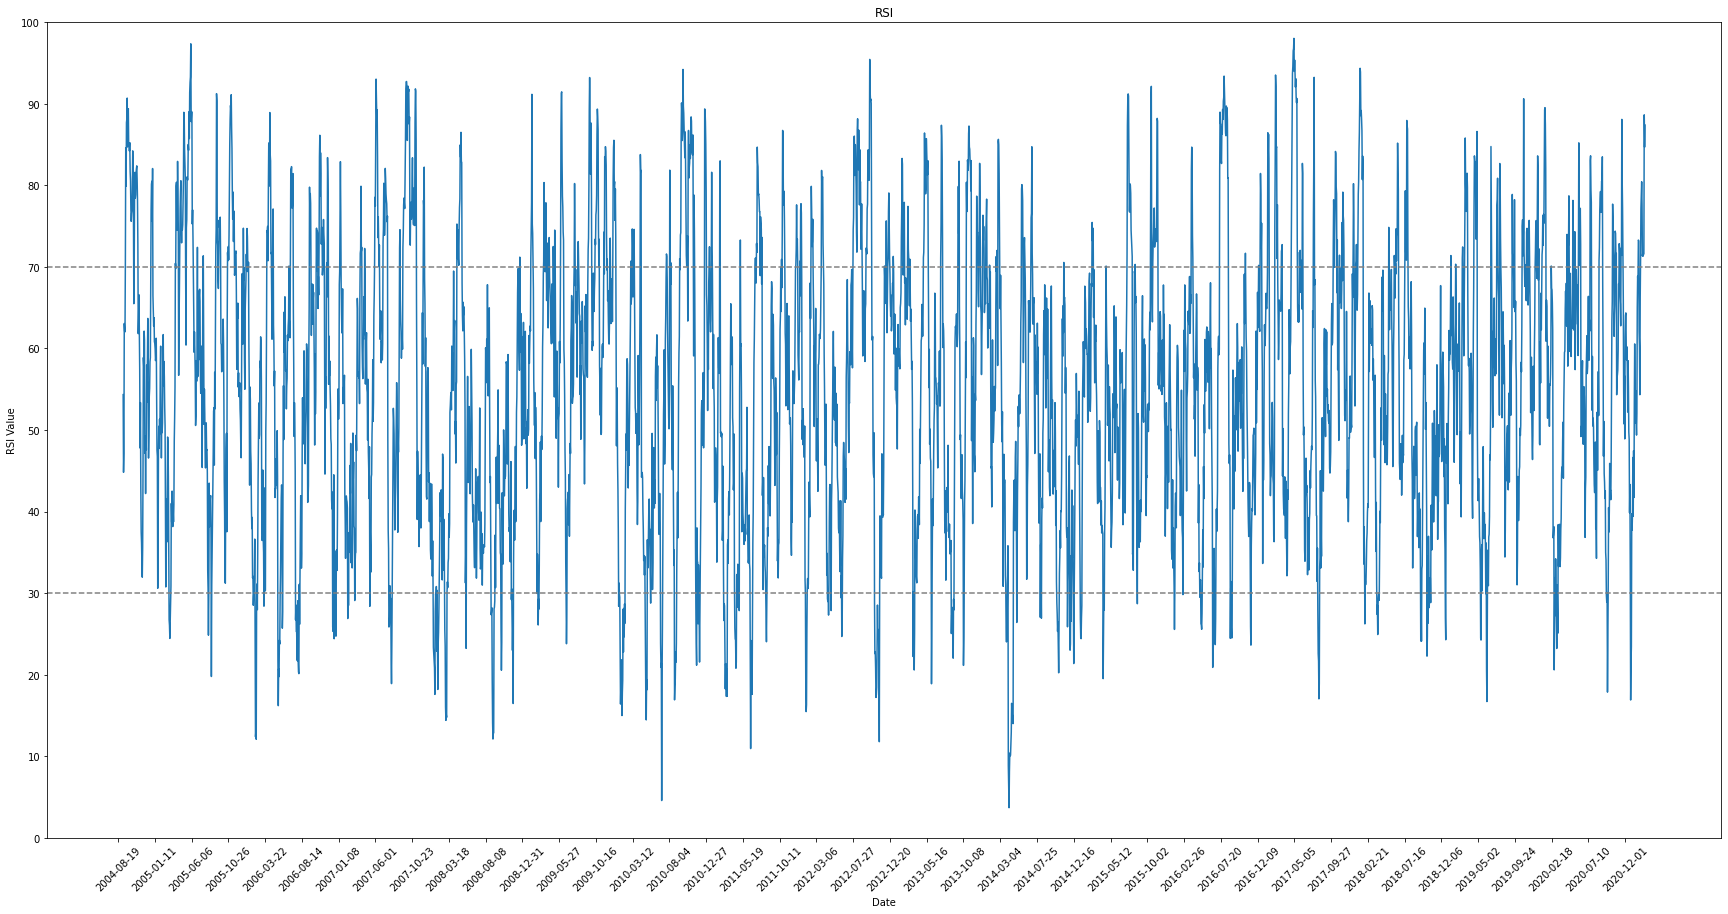

In [ ]:
# RSI 14 days
import numpy as np

def Rsi_period(series, period):
  u = series.copy()
  u[series<=0]=0.0
  d = abs(series.copy())
  d[series>0]=0.0
  RS_up = u.rolling(period).mean()
  RS_down = d.rolling(period).mean()
  rsi= 100-100/(1+RS_up/RS_down)
  return rsi

df['RSI'] = Rsi_period(df['daily_change'], 14)

fig, ax = plt.subplots(figsize=(30,15))
plt.plot(df['date'], df['RSI'])
plt.axhline(y=70,color='gray',linestyle='--')
plt.axhline(y=30,color='gray',linestyle='--')
plt.xlabel('Date')
plt.ylabel('RSI Value')
plt.title('RSI')
plt.xticks(rotation=45)

ax.set_ylim(0,100)
ax.set_xticks(ax.get_xticks()[::100])
ax.set_yticks([0,10,20,30,40,50,60,70,80,90,100])
plt.show()


In [ ]:
# RSI Signal Generation (first method)

# df['RSI_Signal'] = 0

# for i in df.index: 
#   if df['RSI'].iloc[i] < 30:
#    df['RSI_Signal'].iloc[i] = 1
#   if df['RSI'].iloc[i] > 70:
#    df['RSI_Signal'].iloc[i] = -1


In [ ]:
# RSI Signal Generation (another method)

#df['rsi1'] = df.apply(lambda x : 1 if x['RSI'] < 30 else 0, axis =1)
#df['rsi2'] = df.apply(lambda x : -1 if x['RSI'] > 70 else 0, axis =1)
#df['RSI_Signal'] = df.apply(lambda x : x['rsi1'] + x['rsi2'], axis =1)

#del df['rsi1']
#del df['rsi2']


In [ ]:
# Optimisation of RSI_Signal (Best method)

df['RSI_Signal'] = 0

for i in df.index: 
  if df['RSI'].iloc[i] < 30:
    df['RSI_Signal'].iloc[i] = 1
  if df['RSI'].iloc[i] > 70:
    df['RSI_Signal'].iloc[i] = -1

df['RSI_Signal'] = df['RSI_Signal'].diff()
df['Checker'] = 1

for i in df.index: 
  if df['RSI'].iloc[i] > 30 and df['RSI'].iloc[i] < 70:
    df['RSI_Signal'].iloc[i] = 0

for i in df.index:
  if df['RSI_Signal'].iloc[i] == 0:
    continue
  if df['RSI_Signal'].iloc[i] == df['Checker'].iloc[i]:
    df['Checker'] = df['Checker'] * -1
  elif df['RSI_Signal'].iloc[i] != df['Checker'].iloc[i]:
    df['RSI_Signal'].iloc[i] = 0

del df['Checker']

# Question: How to optimize RSI_Signal...
# Currently its something like this [0, 0, ..., 1, 0, 0, 1, 0 ,-1, 0, -1, ...]

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
# Looking at current state of df
df

,date,open,high,low,close,volume,intra_change,daily_change,50_days MA,100_days MA,200_days MA,Signal,RSI,RSI_Signal
0,2004-08-19,100.01,104.0600,95.96,100.335,44659000,0.324968,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,2004-08-20,101.01,109.0800,100.50,108.310,22834300,7.227007,7.948373,NaN,NaN,NaN,0.0,NaN,0.0
2,2004-08-23,110.76,113.4800,109.05,109.400,18256100,-1.227880,1.006371,NaN,NaN,NaN,0.0,NaN,0.0
3,2004-08-24,111.24,111.6000,103.57,104.870,15247300,-5.726357,-4.140768,NaN,NaN,NaN,0.0,NaN,0.0
4,2004-08-25,104.76,108.0000,103.88,106.000,9188600,1.183658,1.077525,NaN,NaN,NaN,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4150,2021-02-12,2079.77,2099.5000,2073.57,2095.030,949525,0.733735,0.300658,1834.8340,1724.4853,1601.60160,0.0,71.568978,0.0
4151,2021-02-16,2091.75,2145.1400,2091.75,2110.700,1550195,0.905940,0.747961,1840.5486,1730.9941,1605.42160,0.0,71.599511,0.0
4152,2021-02-17,2093.98,2122.4434,2088.35,2118.620,986524,1.176707,0.375231,1846.4842,1738.0864,1609.42810,0.0,88.652358,0.0
4153,2021-02-18,2105.00,2121.9900,2093.33,2105.810,1128549,0.038480,-0.604639,1852.1252,1744.9159,1613.34265,0.0,84.692454,0.0


In [ ]:
# End OBV

def OBV(df):
  OB_value = df['volume'].iloc[0]
  for i,row in df.iterrows():
    if i == 0:
        continue
    if df['close'].iloc[i] > df['close'].iloc[(i-1)]:
        OB_value = OB_value + df['volume'].iloc[i] 
    if df['close'].iloc[i] < df['close'].iloc[(i-1)]:
        OB_value = OB_value - df['volume'].iloc[i] 
  return OB_value

endingobv = OBV(df)
print(endingobv)

1407954149


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


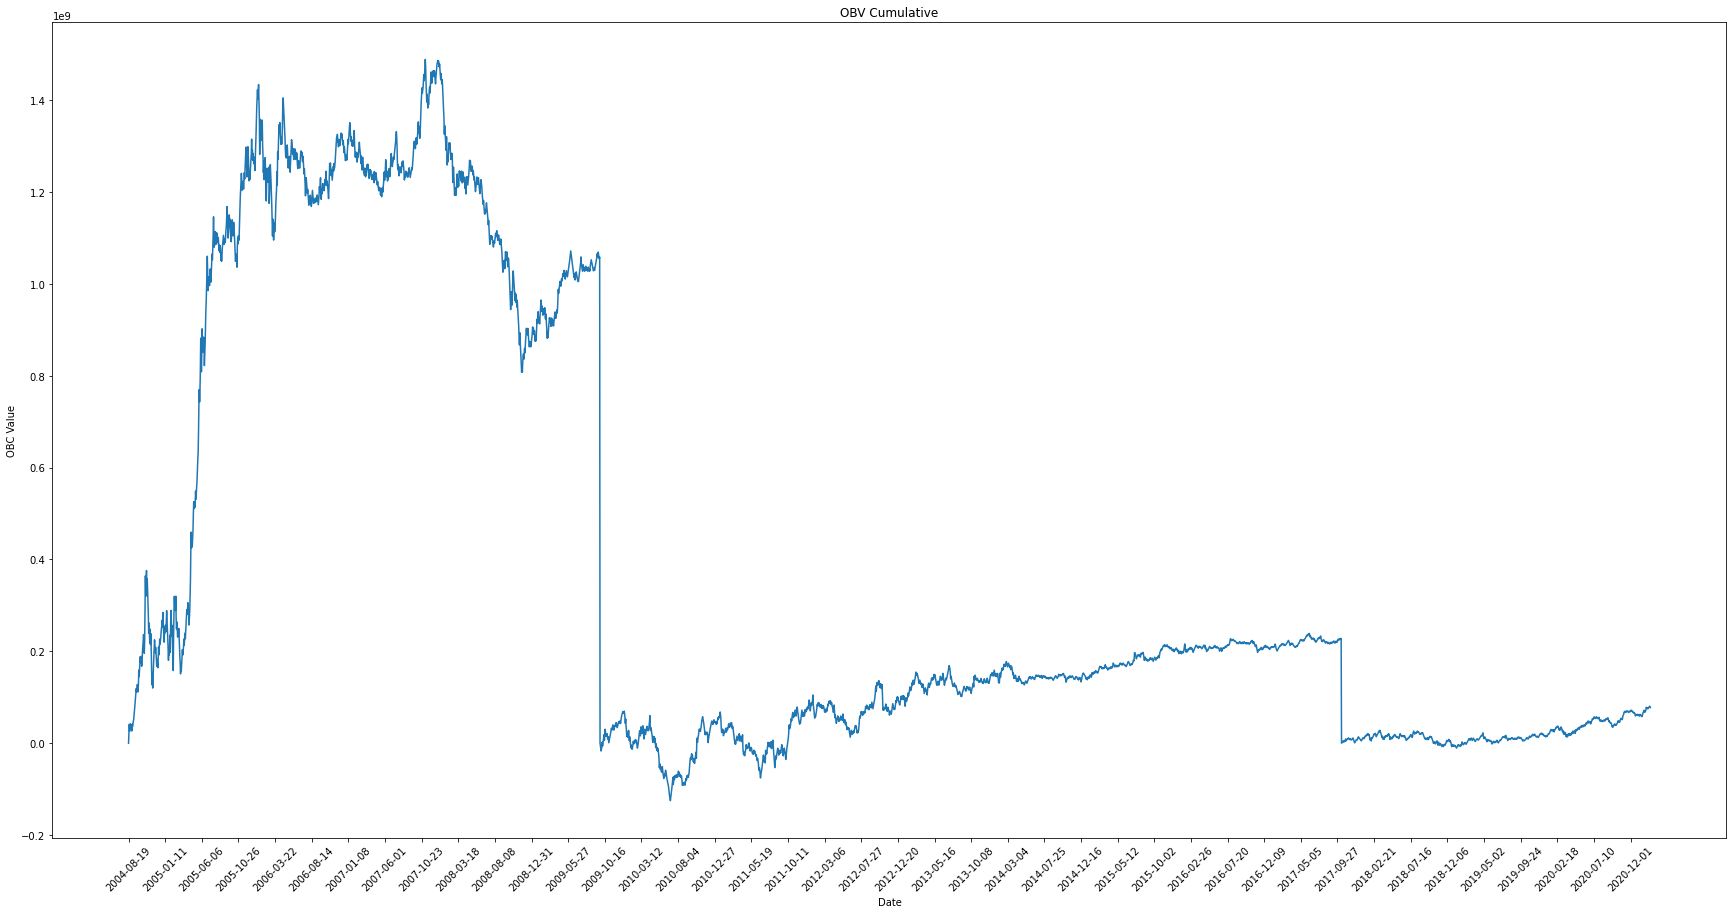

In [ ]:
# OBV Graph (OB Cumulative)
# Initiating column 'OBC'
df['OBC'] = 0

for i in df.index: 
  df['OBC'].iloc[0] = 0
  if df['close'].iloc[i] > df['close'].iloc[(i-1)]:
    df['OBC'].iloc[i] = df['OBC'].iloc[(i-1)] + df['volume'].iloc[i]
  if df['close'].iloc[i] < df['close'].iloc[(i-1)]:
    df['OBC'].iloc[i] = df['OBC'].iloc[(i-1)] - df['volume'].iloc[i]

df

fig, ax = plt.subplots(figsize=(30,15))
plt.plot(df['date'], df['OBC'])
plt.xlabel('Date')
plt.ylabel('OBC Value')
plt.title('OBV Cumulative')
plt.xticks(rotation=45)

ax.set_xticks(ax.get_xticks()[::100])
plt.show()

In [ ]:
!pip install v20
!pip install oandapyV20

     |████████████████████████████████| 81kB 3.6MB/s 
     |████████████████████████████████| 184kB 7.7MB/s 
  Created wheel for v20: filename=v20-3.0.25.0-cp36-none-any.whl size=85761 sha256=2e09ab49c5f75e615b89b728ae039aae03717dd2bc2d59c3d4afaf4c97e11e92
  Stored in directory: /root/.cache/pip/wheels/2e/e6/cf/5d1e2fc46636f8ac745eda7bc5a859ae0c5072e07ce0023e0f
Successfully built v20
     |████████████████████████████████| 61kB 3.2MB/s 
  Created wheel for oandapyV20: filename=oandapyV20-0.6.3-cp36-none-any.whl size=69742 sha256=28afae0c3d262975f12c3ef0de75b70db22b5a1395ab697665e5c6c5b38bcb75
  Stored in directory: /root/.cache/pip/wheels/2c/b0/cd/49054320a6cc51db0ff4f1ee15d8840375f16cef57b81ebfc0
Successfully built oandapyV20


In [ ]:
import pandas as pd
import json
import oandapyV20 as opy
import oandapyV20.endpoints.accounts as accounts

In [ ]:
#account_id = YOUR_ACCOUNT_ID
account_id = "Maverick Hong"

#access_token = YOUR_ACCESS_TOKEN
access_token = "dbce826c23b33abbc19a05b8290c3d93-3a57e619c5cc65f8cbee588a48bc9b8d"

In [ ]:
client = opy.API(environment='practice',
                access_token=access_token)

In [ ]:
r = accounts.AccountList()
response = client.request(r)

print(json.dumps(response))

{"accounts": [{"id": "101-003-12554376-001", "tags": []}]}


In [ ]:
print("API-path: " , r)
print("METHOD: ", r.method)
print("Response status: ", r.status_code)
print("The account id's: ", [acc.get('id') for acc in r.response.get('accounts')])

API-path:  v3/accounts
METHOD:  GET
Response status:  200
The account id's:  ['101-003-12554376-001']


In [ ]:
import oandapyV20.endpoints.instruments as instruments

instrument = "USD_SGD"
params = {
    "from": "2019-01-01T00:00:00Z",
    "granularity": "H1",
    "count": 50,
}

r = instruments.InstrumentsCandles(instrument=instrument, params=params)
response = client.request(r)
print("Request: {}  #candles received: {}".format(r, len(r.response.get('candles'))))
print(json.dumps(response, indent=2))

Request: v3/instruments/USD_SGD/candles  #candles received: 50
{
  "instrument": "USD_SGD",
  "granularity": "H1",
  "candles": [
    {
      "complete": true,
      "volume": 111,
      "time": "2019-01-01T22:00:00.000000000Z",
      "mid": {
        "o": "1.36290",
        "h": "1.36337",
        "l": "1.36290",
        "c": "1.36337"
      }
    },
    {
      "complete": true,
      "volume": 2359,
      "time": "2019-01-01T23:00:00.000000000Z",
      "mid": {
        "o": "1.36337",
        "h": "1.36345",
        "l": "1.36283",
        "c": "1.36292"
      }
    },
    {
      "complete": true,
      "volume": 1219,
      "time": "2019-01-02T00:00:00.000000000Z",
      "mid": {
        "o": "1.36292",
        "h": "1.36394",
        "l": "1.36288",
        "c": "1.36382"
      }
    },
    {
      "complete": true,
      "volume": 1800,
      "time": "2019-01-02T01:00:00.000000000Z",
      "mid": {
        "o": "1.36383",
        "h": "1.36510",
        "l": "1.36383",
        "

In [ ]:
from oandapyV20.contrib.factories import InstrumentsCandlesFactory

In [ ]:
instrument = "USD_SGD"
params = {
    "from": "2019-01-01T00:00:00Z",
    "granularity": "H1",
    "count": 50,
}

n = 0
for r in InstrumentsCandlesFactory(instrument=instrument, params=params):
    rv = client.request(r)
    cnt = len(r.response.get('candles'))
    n += cnt
    print(r.response)

{'instrument': 'USD_SGD', 'granularity': 'H1', 'candles': [{'complete': True, 'volume': 111, 'time': '2019-01-01T22:00:00.000000000Z', 'mid': {'o': '1.36290', 'h': '1.36337', 'l': '1.36290', 'c': '1.36337'}}, {'complete': True, 'volume': 2359, 'time': '2019-01-01T23:00:00.000000000Z', 'mid': {'o': '1.36337', 'h': '1.36345', 'l': '1.36283', 'c': '1.36292'}}, {'complete': True, 'volume': 1219, 'time': '2019-01-02T00:00:00.000000000Z', 'mid': {'o': '1.36292', 'h': '1.36394', 'l': '1.36288', 'c': '1.36382'}}, {'complete': True, 'volume': 1800, 'time': '2019-01-02T01:00:00.000000000Z', 'mid': {'o': '1.36383', 'h': '1.36510', 'l': '1.36383', 'c': '1.36499'}}, {'complete': True, 'volume': 2695, 'time': '2019-01-02T02:00:00.000000000Z', 'mid': {'o': '1.36500', 'h': '1.36653', 'l': '1.36499', 'c': '1.36566'}}, {'complete': True, 'volume': 1165, 'time': '2019-01-02T03:00:00.000000000Z', 'mid': {'o': '1.36566', 'h': '1.36604', 'l': '1.36558', 'c': '1.36590'}}, {'complete': True, 'volume': 1145, '

In [ ]:
# Implementing code onto data

USDSGD_data = json.dumps(response, indent=2)
print(USDSGD_data)

{
  "instrument": "USD_SGD",
  "granularity": "H1",
  "candles": [
    {
      "complete": true,
      "volume": 111,
      "time": "2019-01-01T22:00:00.000000000Z",
      "mid": {
        "o": "1.36290",
        "h": "1.36337",
        "l": "1.36290",
        "c": "1.36337"
      }
    },
    {
      "complete": true,
      "volume": 2359,
      "time": "2019-01-01T23:00:00.000000000Z",
      "mid": {
        "o": "1.36337",
        "h": "1.36345",
        "l": "1.36283",
        "c": "1.36292"
      }
    },
    {
      "complete": true,
      "volume": 1219,
      "time": "2019-01-02T00:00:00.000000000Z",
      "mid": {
        "o": "1.36292",
        "h": "1.36394",
        "l": "1.36288",
        "c": "1.36382"
      }
    },
    {
      "complete": true,
      "volume": 1800,
      "time": "2019-01-02T01:00:00.000000000Z",
      "mid": {
        "o": "1.36383",
        "h": "1.36510",
        "l": "1.36383",
        "c": "1.36499"
      }
    },
    {
      "complete": true,
    

In [ ]:
# Convert string dictionary to dictionary

USDSGD_data = json.loads(USDSGD_data) 

# Double checking the data

print(USDSGD_data)

{'instrument': 'USD_SGD', 'granularity': 'H1', 'candles': [{'complete': True, 'volume': 111, 'time': '2019-01-01T22:00:00.000000000Z', 'mid': {'o': '1.36290', 'h': '1.36337', 'l': '1.36290', 'c': '1.36337'}}, {'complete': True, 'volume': 2359, 'time': '2019-01-01T23:00:00.000000000Z', 'mid': {'o': '1.36337', 'h': '1.36345', 'l': '1.36283', 'c': '1.36292'}}, {'complete': True, 'volume': 1219, 'time': '2019-01-02T00:00:00.000000000Z', 'mid': {'o': '1.36292', 'h': '1.36394', 'l': '1.36288', 'c': '1.36382'}}, {'complete': True, 'volume': 1800, 'time': '2019-01-02T01:00:00.000000000Z', 'mid': {'o': '1.36383', 'h': '1.36510', 'l': '1.36383', 'c': '1.36499'}}, {'complete': True, 'volume': 2695, 'time': '2019-01-02T02:00:00.000000000Z', 'mid': {'o': '1.36500', 'h': '1.36653', 'l': '1.36499', 'c': '1.36566'}}, {'complete': True, 'volume': 1165, 'time': '2019-01-02T03:00:00.000000000Z', 'mid': {'o': '1.36566', 'h': '1.36604', 'l': '1.36558', 'c': '1.36590'}}, {'complete': True, 'volume': 1145, '

In [ ]:
with open('googlepricedata.json', 'w') as outfile:
    json.dump(USDSGD_data, outfile)
